In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
df= pd.read_csv("D:\pyt\Assignment\Assignment 7-Clustering\crime_data.csv")

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df1=df.drop("Unnamed: 0", axis=1)
df1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


# Using standardized data

In [8]:
std_df= StandardScaler().fit_transform(df1)

In [33]:
dbscan= DBSCAN(eps=1, min_samples=3)
clust_label= dbscan.fit_predict(std_df)
clust_label

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [34]:
clust= pd.DataFrame({"clust_label":clust_label})
df2=pd.concat([df1, clust], axis=1)
df2.head()

,Murder,Assault,UrbanPop,Rape,clust_label
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1


<AxesSubplot:xlabel='clust_label', ylabel='count'>

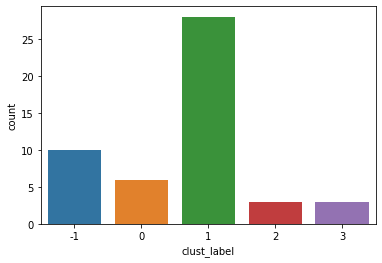

In [35]:
sns.countplot(x="clust_label", data= df2)

In [38]:
silhouette_score(std_df, clust_label)

0.19290975823254836

# Using normalized data

In [39]:
norm_df= Normalizer().fit_transform(df1)

In [64]:
dbscan_norm= DBSCAN(eps=0.035, min_samples=4)
clust_label_norm= dbscan_norm.fit_predict(norm_df)
clust_label_norm = pd.DataFrame({"clust_label_norm":clust_label_norm})

<AxesSubplot:xlabel='clust_label_norm', ylabel='count'>

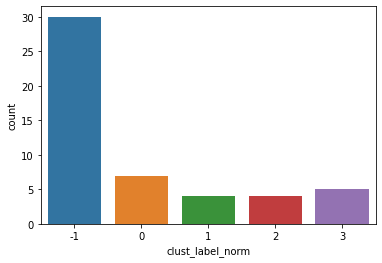

In [69]:
sns.countplot(x="clust_label_norm", data=clust_label_norm)
